In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as m
import seaborn as s

In [17]:
data=pd.read_csv("/content/creditcardfraud.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10492 entries, 0 to 10491
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10492 non-null  float64
 1   V1      10492 non-null  float64
 2   V2      10492 non-null  float64
 3   V3      10492 non-null  float64
 4   V4      10492 non-null  float64
 5   V5      10492 non-null  float64
 6   V6      10492 non-null  float64
 7   V7      10492 non-null  float64
 8   V8      10492 non-null  float64
 9   V9      10492 non-null  float64
 10  V10     10492 non-null  float64
 11  V11     10492 non-null  float64
 12  V12     10492 non-null  float64
 13  V13     10492 non-null  float64
 14  V14     10492 non-null  float64
 15  V15     10492 non-null  float64
 16  V16     10492 non-null  float64
 17  V17     10492 non-null  float64
 18  V18     10492 non-null  float64
 19  V19     10492 non-null  float64
 20  V20     10492 non-null  float64
 21  V21     10492 non-null  float64
 22

In [19]:
data.dropna(inplace=True)
x=data.iloc[:,[29, 30]].values

In [20]:
print(x)

[[  1.     0.  ]
 [ 29.9    0.  ]
 [ 28.75   0.  ]
 ...
 [ 77.89   1.  ]
 [245.     1.  ]
 [ 42.53   1.  ]]


In [21]:
wcss = []
for i in range(1, 11):
 Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=32)
 Kmeans.fit(x)
 wcss.append(Kmeans.inertia_)

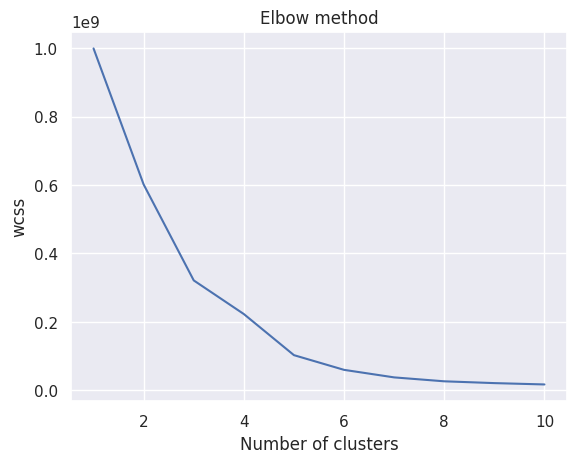

In [22]:
s.set()
m.plot(range(1,11),wcss)
m.title('Elbow method')
m.xlabel('Number of clusters')
m.ylabel('wcss')
m.show()

In [23]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=32)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 ... 0 0 0]


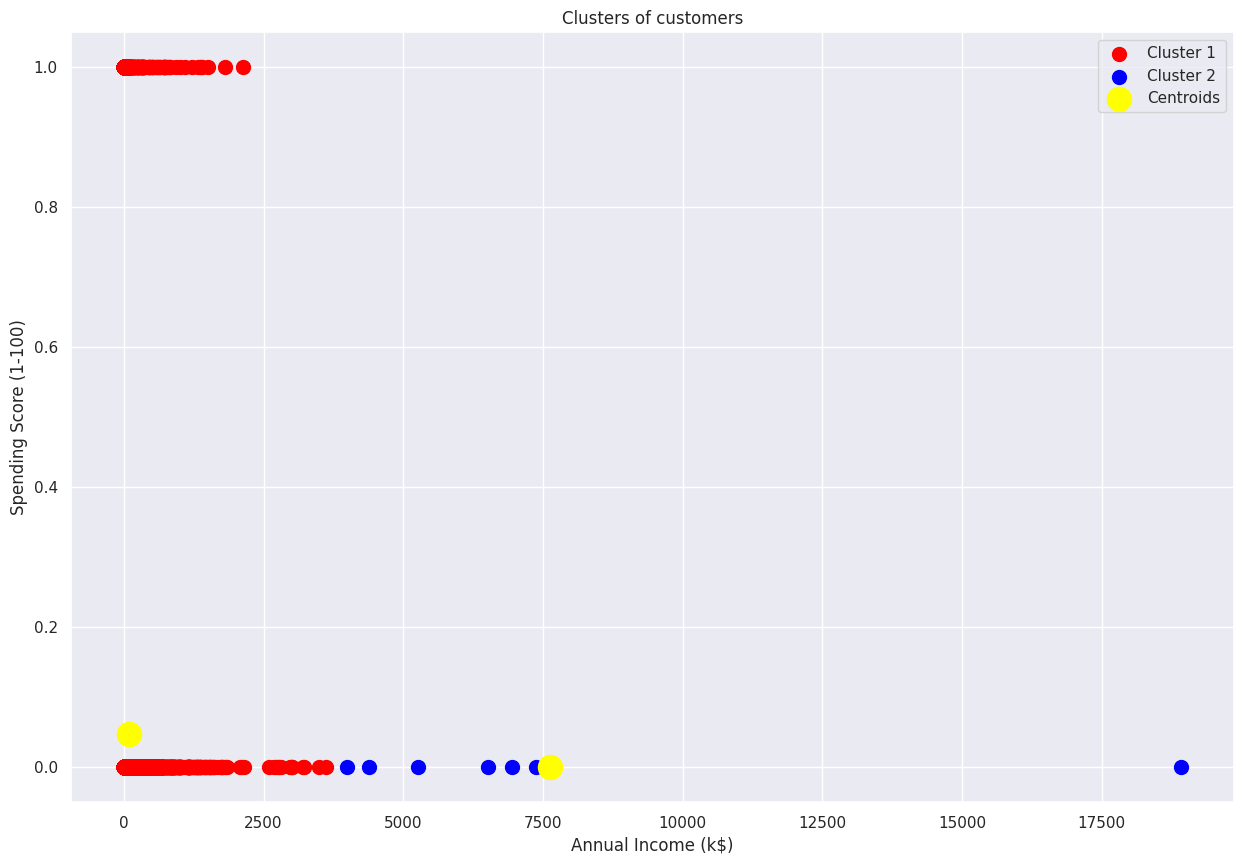

In [24]:
m.figure(figsize=(15,10))
m.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
m.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
m.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
m.title('Clusters of customers')
m.xlabel('Annual Income (k$)')
m.ylabel('Spending Score (1-100)')
m.legend()
m.show()

In [25]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, y_kmeans)
print(f"The silhouette score is: {silhouette_avg}")

The silhouette score is: 0.9817631659551529
